## Feature Matching

### Import libraries and load in the image

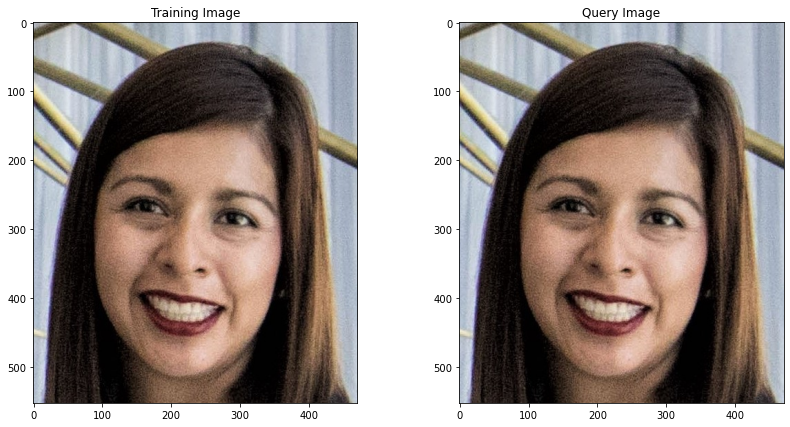

In [1]:
import cv2
import matplotlib.pyplot as plt

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Load the training image
image1 = cv2.imread('D:/ComputerVision/images/face.jpeg')

# Load the query image
image2 = cv2.imread('D:/ComputerVision/images/face.jpeg')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the query image to RGB
query_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the training and query images
plt.subplot(121)
plt.title('Training Image')
plt.imshow(training_image)
plt.subplot(122)
plt.title('Query Image')
plt.imshow(query_image)
plt.show()

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)

# Convert the query image to gray scale
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)

### Find keypoints

In [3]:
orb= cv2.ORB_create(1000,2.0)

# Find the keypoints in the gray scale training and query images and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask in either case.
keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_querry = orb.detectAndCompute(query_gray, None)


### Create a Brute Force Matcher Object

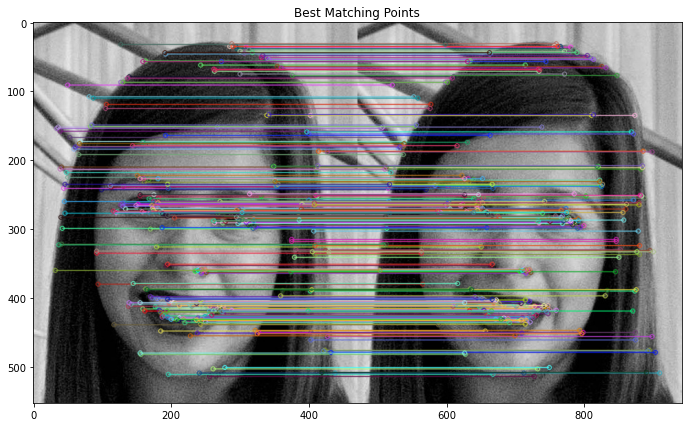

Number of Keypoints Detected In The Training Image:  821
Number of Keypoints Detected In The Query Image:  821

Number of Matching Keypoints Between The Training and Query Images:  821


In [4]:
# Set crossCheck to True so that the BFMatcher will only return consistent pairs
# Such technique usually produces best results with minimal number of outliers when there are enough matches.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the query image
matches = bf.match(descriptors_train, descriptors_querry)

# The matches with shorter distance are the ones we want. So, we sort the matches according to distance
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the training image with their best matching keypoints in the query image.
# The best matches correspond to the first elements in the sorted matches list, since they are the ones
# with the shorter distance. We draw the first 300 mathces and use flags = 2 to plot the matching keypoints
# without size or orientation.
result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:300], query_gray, flags = 2)

# Display the best matching points
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))